## Predictive modeling of customer bookings



## Contents

#### 1. Introduction

#### 2. Data Exploration & Preparation
    2.1 Data Cleaning and Preprocessing
    2.2 Exploratory Data Analysis

#### 3. Training a ML Model
    3.1 Splitting the Dataset
    3.2 RandomForest
    
#### 4. Model Performance Evaluation
    
***

### 1. Introduction

* Understanding what variables contribute towards a customer booking holiday with British Airways.
* Understanding whether the data being used is viable to predict which customers are most likely to buy a holiday with British Airways.
* We will manipulate and prepare the `customer_booking.csv` file to build a high-quality predictive model.



***

### 2.  Data Exploration & Preparation


#### 2.1 Data Cleaning and Preprocessing

In [1]:
# IMPORTING RELEVANT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

from numpy import asarray
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
# checking for null / NaN values
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.


Checking for duplicated rows:

In [5]:
print(f"Duplicated rows: {df.duplicated().sum()}")

Duplicated rows: 719


There are 719 duplicate entries! We will drop them in the cell below:

In [6]:
df = df.drop_duplicates(keep='first')
print("Duplicated rows: ", df.duplicated().sum())

Duplicated rows:  0



To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion, as ML algorithms cannot operate directly on label data.

In [7]:
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [8]:
cat_cols

['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

We have 5 variables that are not numerical. They are all categorical variables, hence there is no ordinal relationship. In this case, we will use **one-hot encoding**, as integer encoding may mislead our model. 

In [9]:
print('Number of types sale: ', df["sales_channel"].nunique())
print('Types of Sales Channel: ', df["sales_channel"].value_counts())

Number of types sale:  2
Types of Sales Channel:  Internet    43917
Mobile       5364
Name: sales_channel, dtype: int64


In [10]:
print('Number of types of trips: ', df["trip_type"].nunique())
print('Types of Trip: ', df["trip_type"].value_counts())

Number of types of trips:  3
Types of Trip:  RoundTrip     48779
OneWay          386
CircleTrip      116
Name: trip_type, dtype: int64


In [11]:
df = pd.get_dummies(data=df, columns=['sales_channel', 'trip_type', 'flight_day'])

In [12]:
"""

print('Days of departure: ', df["flight_day"].unique())

mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

print('Days of departure converted: ', df["flight_day"].unique())

"""


'\n\nprint(\'Days of departure: \', df["flight_day"].unique())\n\nmapping = {\n    "Mon": 1,\n    "Tue": 2,\n    "Wed": 3,\n    "Thu": 4,\n    "Fri": 5,\n    "Sat": 6,\n    "Sun": 7,\n}\n\ndf["flight_day"] = df["flight_day"].map(mapping)\n\nprint(\'Days of departure converted: \', df["flight_day"].unique())\n\n'

I am choosing to drop the 'route' and 'booking_origin' columns because they both have a high number of different categories. I have decided to do this because:

1. If we did one-hot encoding or dummy encoding, there would be a very high number of dimensions, and also there wouldn't be much useful information from it, especially the categories that have a small value count. 
2. If we chose to only include, say, the top 20 most occurring categories from each column, we would be left with around 35,000 missing values - over half of our dataset! 

Hence, I've decided to omit these columns from further analysis.

In [13]:
print('Number of types of route: ', df["route"].value_counts())

Number of types of route:  AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
AKLHGH       1
JEDPDG       1
JEDPEN       1
DACPEK       1
MRUXIY       1
Name: route, Length: 799, dtype: int64


In [14]:
print('Number of countries where booking was made from: ', df["booking_origin"].value_counts())

Number of countries where booking was made from:  Australia               17691
Malaysia                 7055
South Korea              4502
Japan                    3819
China                    3284
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64


In [15]:
df = df.drop(['route', 'booking_origin'], axis=1)
df

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,...,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
0,2,262,19,7,1,0,0,5.52,0,1,...,0,0,1,0,0,1,0,0,0,0
1,1,112,20,3,0,0,0,5.52,0,1,...,0,0,1,0,0,1,0,0,0,0
2,2,243,22,17,1,1,0,5.52,0,1,...,0,0,1,0,0,0,0,0,0,1
3,1,96,31,4,0,0,1,5.52,0,1,...,0,0,1,0,0,1,0,0,0,0
4,2,68,22,15,1,0,1,5.52,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,1,0,1,5.62,0,1,...,0,0,1,0,0,1,0,0,0,0
49996,1,111,6,4,0,0,0,5.62,0,1,...,0,0,1,0,0,0,1,0,0,0
49997,1,24,6,22,0,0,1,5.62,0,1,...,0,0,1,0,0,1,0,0,0,0
49998,1,15,6,11,1,0,1,5.62,0,1,...,0,0,1,0,1,0,0,0,0,0


In [16]:
print('Number of types sale: ', df["length_of_stay"])


Number of types sale:  0        19
1        20
2        22
3        31
4        22
         ..
49995     6
49996     6
49997     6
49998     6
49999     6
Name: length_of_stay, Length: 49281, dtype: int64


*(Parts of the section above is sourced from the 'Getting Started' Jupyter Notebook from The Forage work experience).*

At this stage, the data is clean, and we can do some exploratory data analysis.

#### 2.2 Exploratory Data Analysis

In [17]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,...,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
0,2,262,19,7,1,0,0,5.52,0,1,...,0,0,1,0,0,1,0,0,0,0
1,1,112,20,3,0,0,0,5.52,0,1,...,0,0,1,0,0,1,0,0,0,0
2,2,243,22,17,1,1,0,5.52,0,1,...,0,0,1,0,0,0,0,0,0,1
3,1,96,31,4,0,0,1,5.52,0,1,...,0,0,1,0,0,1,0,0,0,0
4,2,68,22,15,1,0,1,5.52,0,1,...,0,0,1,0,0,0,0,0,0,1


In [18]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,...,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,...,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,1.590187,84.723281,23.053976,9.070676,0.668229,0.295631,0.426635,7.279974,0.149977,0.891155,...,0.002354,0.007833,0.989814,0.135651,0.162091,0.116130,0.130720,0.148597,0.153365,0.153447
std,1.016538,90.410229,33.832149,5.413099,0.470854,0.456331,0.494593,1.496390,0.357052,0.311448,...,0.048460,0.088156,0.100414,0.342421,0.368538,0.320384,0.337097,0.355694,0.360343,0.360421
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


I am going to normalize the 'purhcase_lead' and 'length_of_stay' columns in the range 0 to 50:

In [19]:
df["purchase_lead"] = ((df["purchase_lead"] - df["purchase_lead"].min()) / (df["purchase_lead"].max() - df["purchase_lead"].min())) * 50
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,...,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
0,2,15.109573,19,7,1,0,0,5.52,0,1,...,0,0,1,0,0,1,0,0,0,0
1,1,6.459054,20,3,0,0,0,5.52,0,1,...,0,0,1,0,0,1,0,0,0,0
2,2,14.013841,22,17,1,1,0,5.52,0,1,...,0,0,1,0,0,0,0,0,0,1
3,1,5.536332,31,4,0,0,1,5.52,0,1,...,0,0,1,0,0,1,0,0,0,0
4,2,3.921569,22,15,1,0,1,5.52,0,1,...,0,0,1,0,0,0,0,0,0,1


In [20]:
df["length_of_stay"] = ((df["length_of_stay"] - df["length_of_stay"].min()) / (df["length_of_stay"].max() - df["length_of_stay"].min())) * 50
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,...,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
0,2,15.109573,1.221080,7,1,0,0,5.52,0,1,...,0,0,1,0,0,1,0,0,0,0
1,1,6.459054,1.285347,3,0,0,0,5.52,0,1,...,0,0,1,0,0,1,0,0,0,0
2,2,14.013841,1.413882,17,1,1,0,5.52,0,1,...,0,0,1,0,0,0,0,0,0,1
3,1,5.536332,1.992288,4,0,0,1,5.52,0,1,...,0,0,1,0,0,1,0,0,0,0
4,2,3.921569,1.413882,15,1,0,1,5.52,0,1,...,0,0,1,0,0,0,0,0,0,1


In [21]:
df.shape

(49281, 21)

There are 50,000 rows, 14 columns. Below is a summary of the numerical variables of the dataset and its statistical properties:

In [22]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,...,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,...,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,1.590187,4.886002,1.481618,9.070676,0.668229,0.295631,0.426635,7.279974,0.149977,0.891155,...,0.002354,0.007833,0.989814,0.135651,0.162091,0.116130,0.130720,0.148597,0.153365,0.153447
std,1.016538,5.213969,2.174303,5.413099,0.470854,0.456331,0.494593,1.496390,0.357052,0.311448,...,0.048460,0.088156,0.100414,0.342421,0.368538,0.320384,0.337097,0.355694,0.360343,0.360421
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.211073,0.321337,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.941176,1.092545,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,6.632065,1.799486,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,50.000000,50.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can investigate the correlation between the different variables. The closer the value is to 1, the stronger the correlation between the two variables, but the closer the value is to -1, the stronger the negative correlation is.  

In [23]:
df.corr()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,...,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
num_passengers,1.000000,0.214999,-0.115380,0.016393,0.120724,0.029509,0.022252,-0.062028,0.024092,0.006202,...,-0.001014,-0.001995,0.002241,-0.012907,0.002578,0.008683,0.022918,-0.005440,-0.008068,-0.006092
purchase_lead,0.214999,1.000000,-0.076747,0.035112,-0.021599,-0.004459,-0.022533,0.067934,-0.022132,0.014501,...,0.005679,0.006917,-0.008813,-0.047217,0.044579,0.002300,0.106873,-0.039761,-0.014304,-0.049186
length_of_stay,-0.115380,-0.076747,1.000000,-0.025525,0.177536,0.031215,0.098846,0.140408,-0.042080,0.058197,...,0.003116,-0.013062,0.009964,0.002517,-0.006940,0.001367,-0.005341,0.005180,0.003575,-0.000202
flight_hour,0.016393,0.035112,-0.025525,1.000000,-0.010911,0.012251,0.011953,-0.003236,0.006705,-0.023650,...,0.000913,0.003220,-0.003267,-0.021561,-0.006190,-0.005388,0.047771,-0.005697,-0.003393,-0.004061
wants_extra_baggage,0.120724,-0.021599,0.177536,-0.010911,1.000000,0.208392,0.216835,0.057637,0.068452,0.055956,...,0.011993,0.008342,-0.013111,-0.000895,-0.005241,0.003864,-0.008531,0.003218,0.004488,0.003091
wants_preferred_seat,0.029509,-0.004459,0.031215,0.012251,0.208392,1.000000,0.315162,0.100652,0.050189,-0.029160,...,-0.000269,-0.007624,0.006823,-0.005363,0.006455,0.009730,0.007327,-0.009990,-0.011524,0.004372
wants_in_flight_meals,0.022252,-0.022533,0.098846,0.011953,0.216835,0.315162,1.000000,0.156233,0.026399,0.026013,...,-0.002954,-0.014279,0.013962,0.004067,-0.003669,0.004529,0.001171,0.003893,-0.007572,-0.001504
flight_duration,-0.062028,0.067934,0.140408,-0.003236,0.057637,0.100652,0.156233,1.000000,-0.106529,0.036642,...,0.015739,0.041141,-0.043714,-0.007555,-0.004326,0.005419,0.025832,-0.006533,-0.006903,-0.004027
booking_complete,0.024092,-0.022132,-0.042080,0.006705,0.068452,0.050189,0.026399,-0.106529,1.000000,0.039320,...,-0.014539,-0.024428,0.028462,-0.004414,-0.000619,-0.000588,-0.009298,0.001713,-0.002764,0.015118
sales_channel_Internet,0.006202,0.014501,0.058197,-0.023650,0.055956,-0.029160,0.026013,0.036642,0.039320,1.000000,...,0.011598,0.018488,-0.021828,-0.011487,0.013870,-0.027470,-0.028957,0.014667,0.016391,0.017370


We can display the data above in a **(triangle) correlation heatmap**:

Text(0.5, 1, 'Triangle Correlation Heatmap')

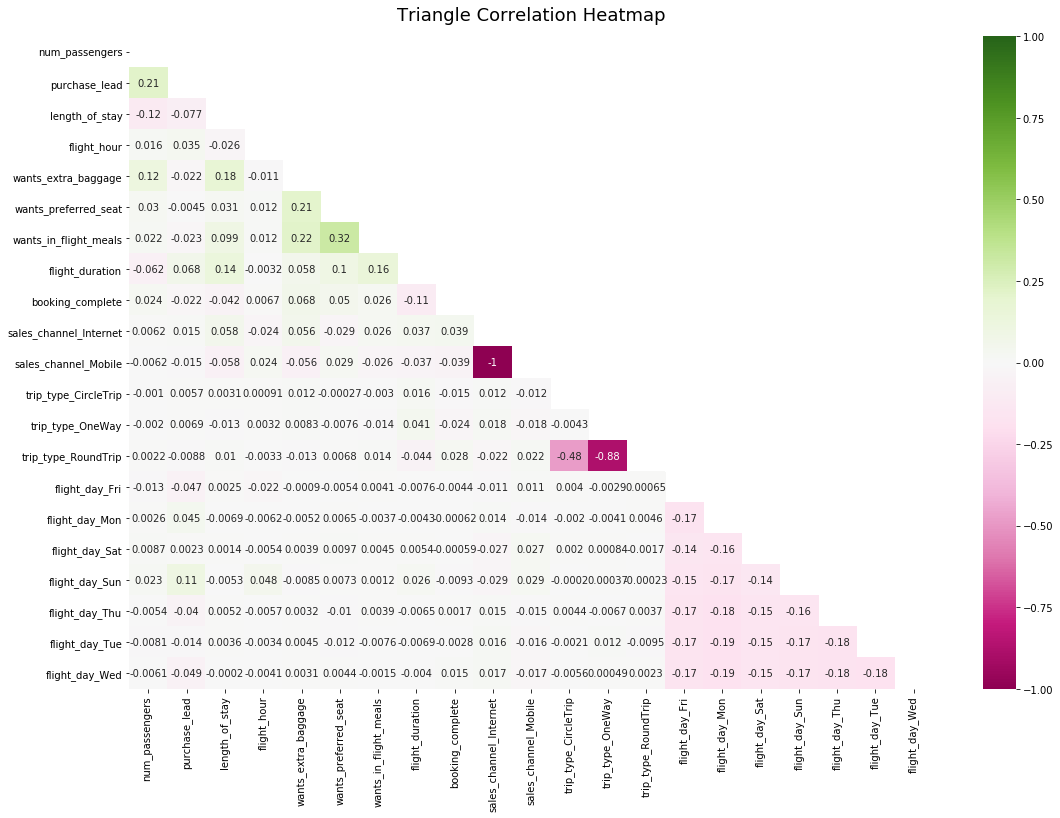

In [24]:
plt.figure(figsize=(18, 12))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='PiYG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

We can see exactly how many bookings were completed (which in the case of this analysis, is our target variable):

In [25]:
df["booking_complete"].value_counts()

0    41890
1     7391
Name: booking_complete, dtype: int64

In [26]:
correlation = df.corr()["booking_complete"]
correlation.abs().sort_values(ascending=False)[1:]

flight_duration           0.106529
wants_extra_baggage       0.068452
wants_preferred_seat      0.050189
length_of_stay            0.042080
sales_channel_Internet    0.039320
sales_channel_Mobile      0.039320
trip_type_RoundTrip       0.028462
wants_in_flight_meals     0.026399
trip_type_OneWay          0.024428
num_passengers            0.024092
purchase_lead             0.022132
flight_day_Wed            0.015118
trip_type_CircleTrip      0.014539
flight_day_Sun            0.009298
flight_hour               0.006705
flight_day_Fri            0.004414
flight_day_Tue            0.002764
flight_day_Thu            0.001713
flight_day_Mon            0.000619
flight_day_Sat            0.000588
Name: booking_complete, dtype: float64

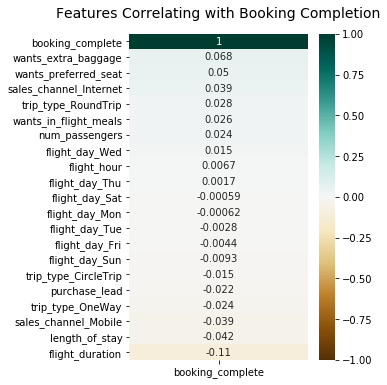

In [27]:
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(df.corr()[['booking_complete']].sort_values(by='booking_complete', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Booking Completion', fontdict={'fontsize':14}, pad=16);

Based on the correlation heatmap above, we can conclude that the top features that are most positively correlated to 'booking_complete' are:

- 'wants_extra_baggage'
- 'wants_preferred_seat'
- 'sales_channel_Internet'

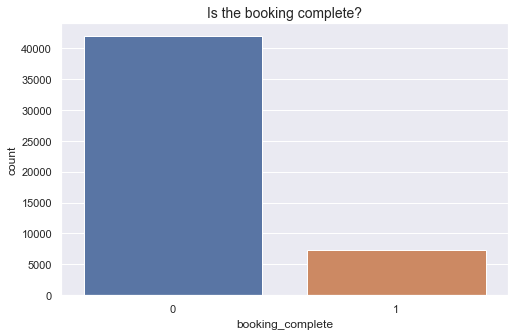

In [28]:
plt.figure(figsize=(8,5))
sns.set(style = "darkgrid")
plt.title("Is the booking complete?", fontdict = {'fontsize': 14})
axis = sns.countplot(x = "booking_complete", data = df)

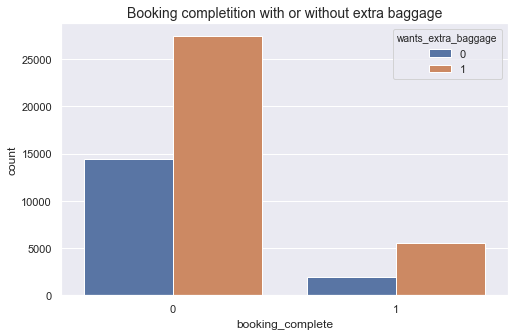

In [29]:
plt.figure(figsize=(8,5))
sns.set(style = "darkgrid")
plt.title("Booking completition with or without extra baggage", fontdict = {'fontsize': 14})
axis = sns.countplot(x = "booking_complete", hue = 'wants_extra_baggage', data = df)

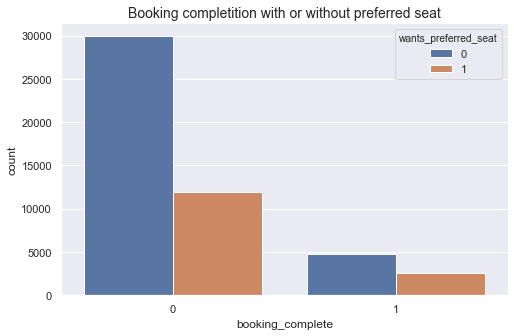

In [30]:
plt.figure(figsize=(8,5))
sns.set(style = "darkgrid")
plt.title("Booking completition with or without preferred seat", fontdict = {'fontsize': 14})
axis = sns.countplot(x = "booking_complete", hue = 'wants_preferred_seat', data = df)

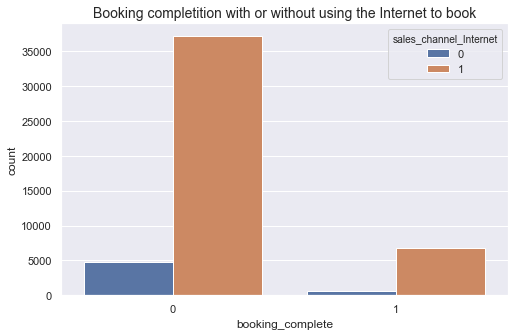

In [31]:
plt.figure(figsize=(8,5))
sns.set(style = "darkgrid")
plt.title("Booking completition with or without using the Internet to book", fontdict = {'fontsize': 14})
axis = sns.countplot(x = "booking_complete", hue = 'sales_channel_Internet', data = df)

***

### 3. Training a ML Model



#### 3.1 Splitting the Dataset

I am going to use all te columns when splitting the dataset into training and test data, because looking at the correlations above, there isn't much difference between them all, and no feature shows a particular strong correlation.

In [32]:
x = df.drop(['booking_complete'], axis=1)
y = df['booking_complete']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=True)

#### 3.2 RandomForest


In [33]:
# explore random forest number of features effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

#forest_model = RandomForestClassifier(n_estimators=100, random_state=1)
#forest_model.fit(x_train, y_train)
forest_model = RandomForestClassifier()
forest_model.fit(x_train, y_train)

#rf_preds = forest_model.predict(x_test)
print('When we use 10 random trees, the accuracy is: ', forest_model.score(x_test, y_test))


When we use 10 random trees, the accuracy is:  0.843157147205032


In [35]:
forest_model = RandomForestClassifier(n_estimators=20)
forest_model.fit(x_train, y_train)

print('When we use 20 random trees, the accuracy is: ', forest_model.score(x_test, y_test))


When we use 20 random trees, the accuracy is:  0.8414324845287613


In [36]:
forest_model = RandomForestClassifier(n_estimators=5)
forest_model.fit(x_train, y_train)

print('When we use 5 random trees, the accuracy is: ', forest_model.score(x_test, y_test))

When we use 5 random trees, the accuracy is:  0.8204321801765243


We can see that using 10 random trees has the highest accuracy, so we will keep the hyperparameter `n_estimators` set to 10.

***

### 4. Model Performance Evaluation


In [46]:
forest_model = RandomForestClassifier()
forest_model.fit(x_train, y_train)
print(forest_model.score(x_test, y_test))

y_predicted = forest_model.predict(x_test)

cm = confusion_matrix(y_test, y_predicted)
cm

0.843360048696358


array([[8249,  110],
       [1434,   64]], dtype=int64)

Text(66.5, 0.5, 'Truth')

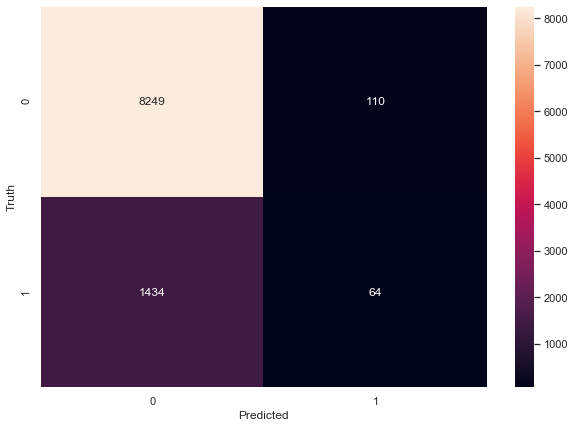

In [52]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report

print('Accuracy: ', metrics.accuracy_score(y_test, y_predicted))
print('Recall: ', metrics.recall_score(y_test, y_predicted, zero_division=1))
print('Precision: ', metrics.precision_score(y_test, y_predicted, zero_division=1))
print(metrics.classification_report(y_test, y_predicted, zero_division=1))

Accuracy:  0.843360048696358
Recall:  0.042723631508678236
Precision:  0.367816091954023
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      8359
           1       0.37      0.04      0.08      1498

    accuracy                           0.84      9857
   macro avg       0.61      0.51      0.50      9857
weighted avg       0.78      0.84      0.79      9857



We can use the `feature_importances` attribute represents a measure of how important each feature is in determining the 'booking_complete'. The features with higher scores are more important with respect to their contribution to the predictions made by the RFC. They are a useful tool for indicating which features are more important for predicitons made by the RFC.

In [49]:
# Print the feature importances
importances = forest_model.feature_importances_
print("Feature Importances: ", importances)

Feature Importances:  [0.05831264 0.28397434 0.17061004 0.19839145 0.01488281 0.01607281
 0.0216562  0.13154616 0.00436514 0.00439748 0.0003266  0.00076321
 0.00111094 0.01279496 0.0140523  0.01250246 0.01262087 0.01389005
 0.01414744 0.01358213]


In [50]:
# Sort the features by their importances and print the feature names
importances_sorted = sorted(zip(importances, x), reverse=True)
print("Sorted Feature Importances:")
for importance, feature_name in importances_sorted:
    print(f"{feature_name}: {importance:.3f}")

Sorted Feature Importances:
purchase_lead: 0.284
flight_hour: 0.198
length_of_stay: 0.171
flight_duration: 0.132
num_passengers: 0.058
wants_in_flight_meals: 0.022
wants_preferred_seat: 0.016
wants_extra_baggage: 0.015
flight_day_Tue: 0.014
flight_day_Mon: 0.014
flight_day_Thu: 0.014
flight_day_Wed: 0.014
flight_day_Fri: 0.013
flight_day_Sun: 0.013
flight_day_Sat: 0.013
sales_channel_Mobile: 0.004
sales_channel_Internet: 0.004
trip_type_RoundTrip: 0.001
trip_type_OneWay: 0.001
trip_type_CircleTrip: 0.000


Text(0, 0.5, 'FEATURE NAMES')

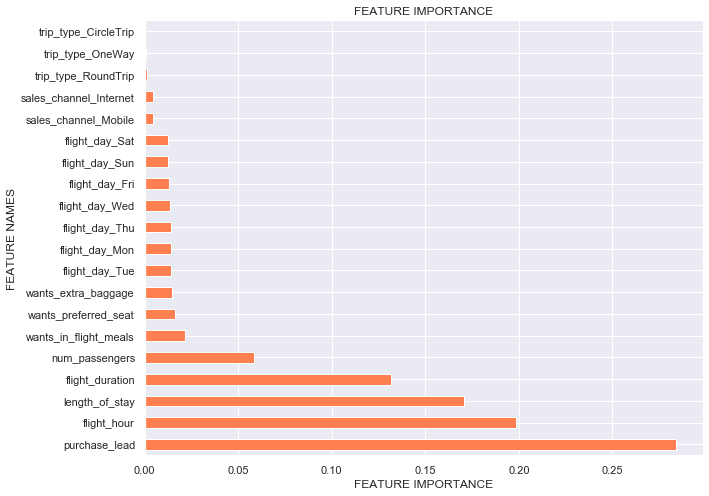

In [51]:
plt.figure(figsize=(10,8))
(pd.Series(forest_model.feature_importances_, index=x.columns)
   .nlargest(20)
   .plot(kind='barh', color='coral')) 
plt.title('FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

We can see that the most important features for the Random Forest Classifier are:
* purchase_lead
* flight_hour
* length_of_stay
* flight_duration 

We can use this information and select them for the model, which can help reduce the dimensionality and avoid overfitting. We can remove the features with low importance scores and keep ony the important ones.

***